In [3]:
#Importing Pacakages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
#Reading the Dataframe
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#Unsderstanding the data
df.shape

(400, 9)

In [19]:
#Changing the index
df.set_index('Serial No.',inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
#Finding the na values 
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
#Finding the variables data types
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [20]:
#Understnading the data
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

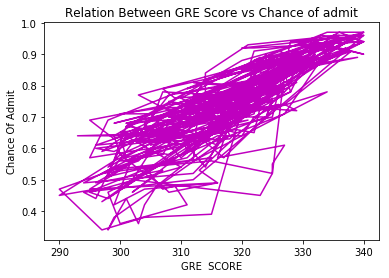

In [25]:
#Finding Co relation between GRE SCore and Chance of admit
plt.plot(df['GRE Score'],df['Chance of Admit '],color='m')
plt.xlabel('GRE  SCORE')
plt.ylabel('Chance Of Admit')
plt.title('Relation Between GRE Score vs Chance of admit')
plt.show()

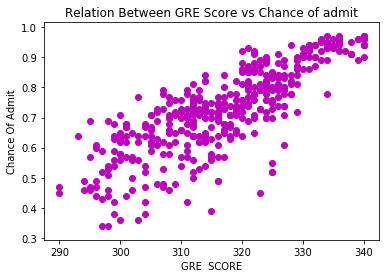

In [26]:
#As Line chart was not effective let's resort to Scatter Plot
plt.scatter(df['GRE Score'],df['Chance of Admit '],color='m')
plt.xlabel('GRE  SCORE')
plt.ylabel('Chance Of Admit')
plt.title('Relation Between GRE Score vs Chance of admit')
plt.show()

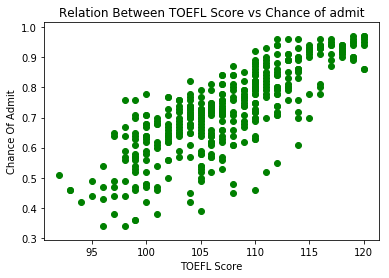

In [27]:
#Finding the co relation between TOEFL Score and Chance of admit using scatter plot
plt.scatter(df['TOEFL Score'],df['Chance of Admit '],color='g')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance Of Admit')
plt.title('Relation Between TOEFL Score vs Chance of admit')
plt.show()

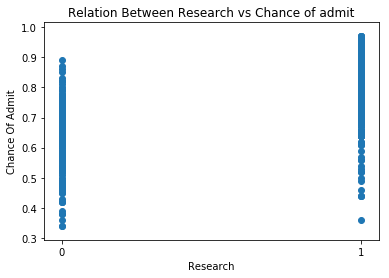

In [60]:
#Finding the co relation between Research and Chance of admit using scatter plot
plt.scatter(df['Research'],df['Chance of Admit '])
plt.xlabel('Research')
plt.ylabel('Chance Of Admit')
plt.title('Relation Between Research vs Chance of admit')
plt.xticks([0,1])
plt.show()

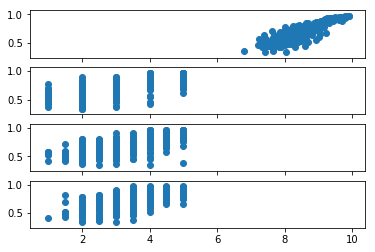

In [74]:
#Finding the co relation between Research and Chance of admit using scatter plot
%matplotlib inline
f,ax=plt.subplots(4,sharex=True, sharey=True)
ax[0].scatter(df['CGPA'],df['Chance of Admit '])
#ax[0].title('CGPA VS Chance Of Admit')
ax[1].scatter(df['University Rating'],df['Chance of Admit '])
#ax[1].title('University Rating VS Chance Of Admit')
ax[2].scatter(df['SOP'],df['Chance of Admit '])
#ax[2].title('SOP VS Chance Of Admit')
ax[3].scatter(df['LOR '],df['Chance of Admit '])
#ax[3].title('LOR VS Chance Of Admit')

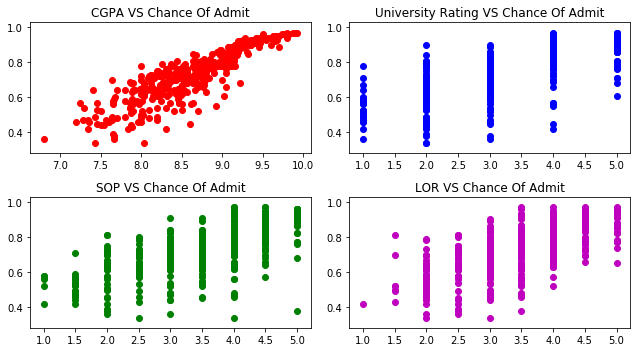

In [85]:
#Finding the co relation between Research and Chance of admit using scatter plot
%matplotlib inline
plt.figure(figsize=(9,5))
plt.subplot(2,2,1)
plt.scatter(df['CGPA'],df['Chance of Admit '],color='r')
plt.title('CGPA VS Chance Of Admit')

plt.subplot(2,2,2)
plt.scatter(df['University Rating'],df['Chance of Admit '],color='b')
plt.title('University Rating VS Chance Of Admit')
pd.crosstab()

plt.subplot(2,2,3)
plt.scatter(df['SOP'],df['Chance of Admit '],color='g')
plt.title('SOP VS Chance Of Admit')

plt.subplot(2,2,4)
plt.scatter(df['LOR '],df['Chance of Admit '],color='m')
plt.title('LOR VS Chance Of Admit')

plt.tight_layout()
plt.show()

In [107]:
#Splitting the data based on independent variable and dependent variable
X=df.iloc[:,:7]
y=df.iloc[:,-1:]

In [154]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8064283305291103

In [158]:
y_pred=reg.predict(X_test)

In [179]:
testdata=pd.read_csv('Admission_Predict_Ver1.1.csv')
testdata.set_index('Serial No.',inplace=True)
X=testdata.iloc[:,:7]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [181]:
test_pred=reg.predict(X)
testdata['Prediction']=test_pred

In [182]:
testdata.to_csv('Result.csv')

        #FINDING ANOTHER METHOD TO CROSS CHECK AND EXAMINE
        #METHOD 2